In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import numpy as np
from IPython.display import Image

In [4]:
#Anzeigelimit für Spalten und Listen deaktivieren
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

In [5]:
#Datensatz der in daten_einlesen.ipynb entstanden ist einlesen
df = pd.read_csv("datensatz.csv")
plotly.offline.init_notebook_mode(connected=True)

In [6]:
#Alter
labels = ['Under 18 years old',
                             '18 - 24 years old',
                             '25 - 34 years old',
                             '35 - 44 years old',
                             '45 - 54 years old',
                             '55 - 64 years old',
                             '65 years or older']
values = df.Age.value_counts(sort=False).reindex(['Under 18 years old',
                                                 '18 - 24 years old',
                                                 '25 - 34 years old',
                                                 '35 - 44 years old',
                                                 '45 - 54 years old',
                                                 '55 - 64 years old',
                                                 '65 years or older'])

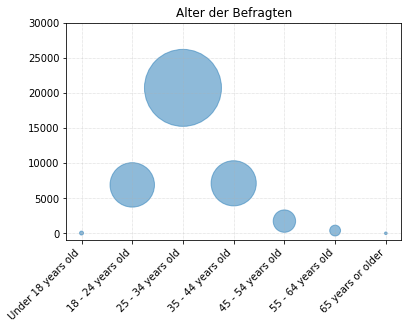

In [7]:
plt.scatter(x=labels, y=values, s=values/3.5, alpha=0.5);
plt.ylim(-1000, 30000)
plt.xticks(rotation=45, horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.title('Alter der Befragten');

In [8]:
#Herkunft
#Abstand von Werten auf y-achse ?
#in letzter Zeile änderbar
#linspace (min wert, max wert, Etappen)
#Teilt den Wertebereich zwischen min und max in ... gleichgroße Etappen ein

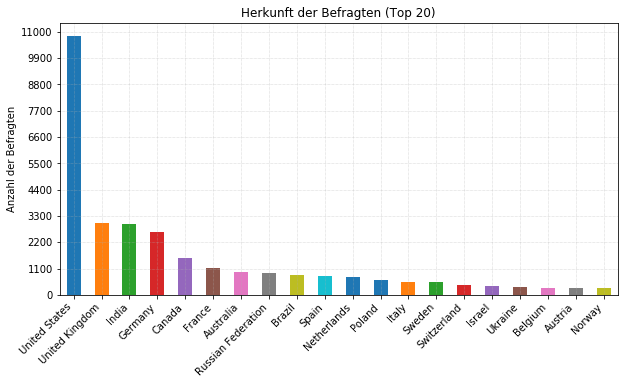

In [9]:
df.Country.value_counts()[:20].sort_values(ascending=False).plot(title='Herkunft der Befragten (Top 20)', kind='bar', rot=45,
                                   figsize=[10,5])
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(ticks=np.linspace(0,11000,11));
plt.ylabel('Anzahl der Befragten');

In [10]:
df.Country.unique().size

148

In [11]:
data = dict(
    type = "sankey",
    orientation = "h",
    valueformat = "%.2f%%",
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(
            color="black",
            width = 0.5),
        label= list(df.FormalEducation.unique())+['Mit Abschluss', 'Ohne Abschluss'],
        color= ['blue']*9 + ['green'] + ['orange']),
    link = dict(
        source = [0,1,2,3,4,5,6,7,8],
        target = [9,10,10,9,10,9,9,10,10],
        value = df.FormalEducation.value_counts()\
        .reindex(df.FormalEducation.unique())/len(df.FormalEducation)))
layout = dict(
    title="Bildungsabschlüsse der Befragten",
    font = dict(
      size = 10)
)
fig = dict(data = [data], layout=layout)
plotly.offline.iplot(fig, validate=False)

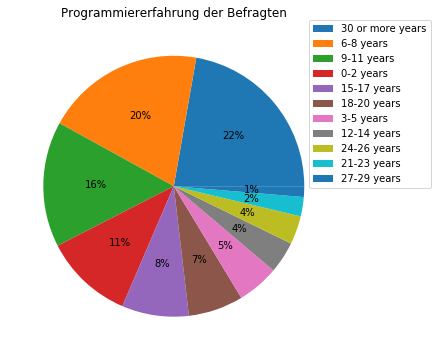

In [12]:
df.YearsCoding.value_counts().plot(title='Programmiererfahrung der Befragten', kind='pie', labels=None,
                                  autopct="%1.0f%%", figsize=(6,6))
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.YearsCoding.unique());

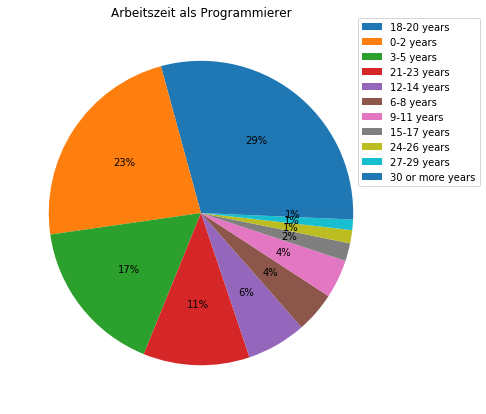

In [13]:
df.YearsCodingProf.value_counts().plot.pie(title="Arbeitszeit als Programmierer",figsize=(7,7), 
                                          autopct="%1.0f%%", labels=None)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.YearsCodingProf.unique());

In [14]:
df.describe()

ConvertedSalary
count     3.707900e+04
mean      9.894769e+04
std       2.046254e+05
min       0.000000e+00
25%       2.937300e+04
50%       5.875200e+04
75%       9.500000e+04
max       2.000000e+06

In [15]:
tmpdfjs = df.JobSatisfaction.value_counts().reindex(['Extremely satisfied',
                                             'Moderately satisfied',
                                             'Slightly satisfied',
                                             'Neither satisfied nor dissatisfied',
                                             'Slightly dissatisfied',
                                             'Moderately dissatisfied',
                                             'Extremely dissatisfied'])

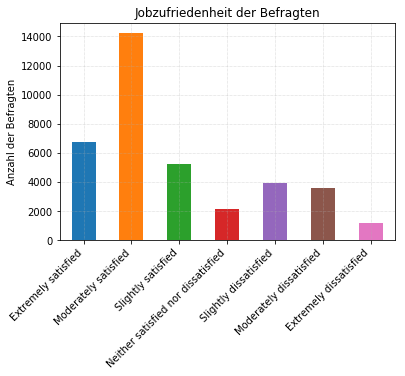

In [16]:
tmpdfjs.plot(title='Jobzufriedenheit der Befragten', kind='bar', rot=45);
plt.xticks( horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.ylabel('Anzahl der Befragten');

In [17]:
tmpdfcsat = df.CareerSatisfaction.value_counts().reindex(['Extremely satisfied',
                                             'Moderately satisfied',
                                             'Slightly satisfied',
                                             'Neither satisfied nor dissatisfied',
                                             'Slightly dissatisfied',
                                             'Moderately dissatisfied',
                                             'Extremely dissatisfied'])

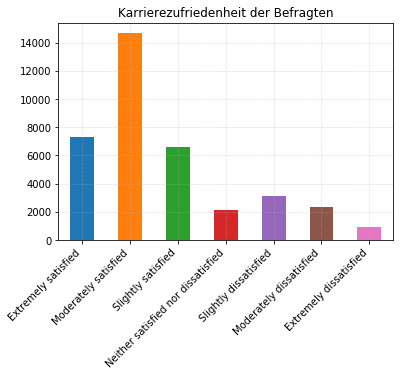

In [18]:
tmpdfcsat.plot(title='Karrierezufriedenheit der Befragten', kind='bar', rot=45)
plt.xticks( horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);

In [19]:
tmpdfwt = df.WakeTime.value_counts().reindex(['I work night shifts',
                                    'After 12:01 PM',
                                    'Between 11:01 AM - 12:00 PM',
                                    'Between 10:01 - 11:00 AM',
                                    'Between 9:01 - 10:00 AM',
                                    'Between 8:01 - 9:00 AM',
                                    'Between 7:01 - 8:00 AM',
                                    'Between 6:01 - 7:00 AM',
                                    'Before 5:00 AM'])

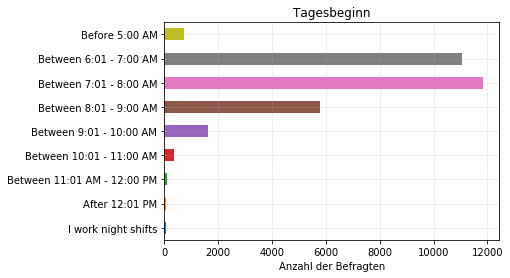

In [20]:
tmpdfwt.plot(title='Tagesbeginn', kind='barh');
plt.grid(linestyle=":", linewidth=0.5);
plt.xlabel('Anzahl der Befragten');

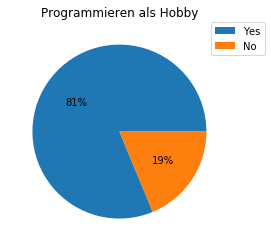

In [21]:
df.Hobby.value_counts().plot(title="Programmieren als Hobby", kind='pie', labels=None, autopct='%1.0f%%')
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.Hobby.unique())

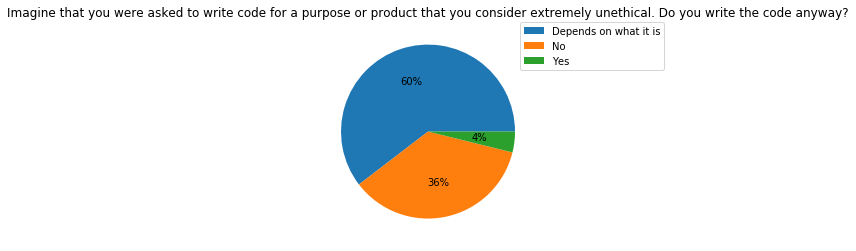

In [22]:
title = 'Imagine that you were asked to write code for a purpose or product that you consider extremely unethical. Do you write the code anyway?'
df.EthicsChoice.value_counts().plot(title=title, kind='pie', labels=None, autopct="%1.0f%%")
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.EthicsChoice.unique())

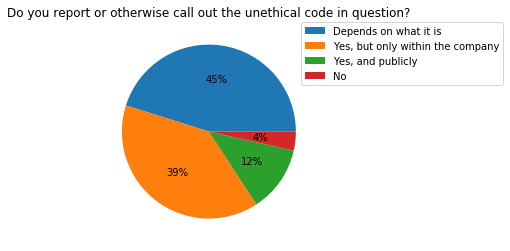

In [23]:
title = 'Do you report or otherwise call out the unethical code in question?'
df.EthicsReport.value_counts().plot(title=title, kind='pie',autopct='%1.0f%%',
                                       labels=None)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.EthicsReport.unique());

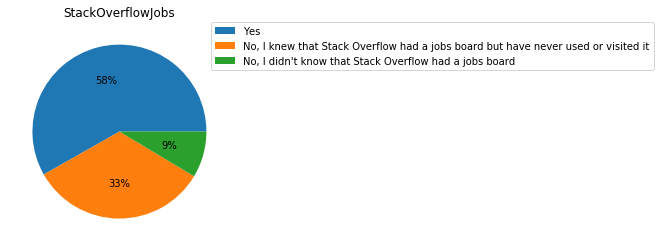

In [24]:
df.StackOverflowJobs.value_counts().plot(title="StackOverflowJobs", kind='pie', autopct='%1.0f%%',
                                       labels=None)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.StackOverflowJobs.unique());

In [25]:
df2 = df.groupby(by=df.JobSatisfaction).mean()
df2


ConvertedSalary
JobSatisfaction                                    
Extremely dissatisfied                110340.100166
Extremely satisfied                   115991.570028
Moderately dissatisfied               101917.091771
Moderately satisfied                   97944.982019
Neither satisfied nor dissatisfied     84444.968195
Slightly dissatisfied                  91961.407511
Slightly satisfied                     86307.674582

In [26]:
tmpdfsalsat = df2.reindex(['Extremely satisfied','Moderately satisfied' , 'Slightly satisfied',
             'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
             'Moderately dissatisfied', 'Extremely dissatisfied'])

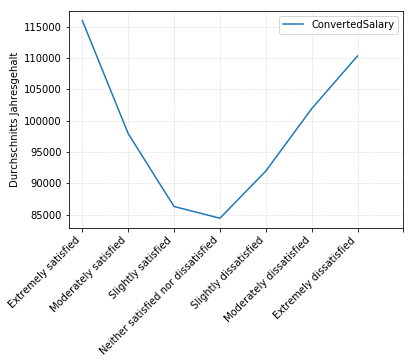

In [27]:
tmpdfsalsat.plot(xticks=range(8), rot=45, );
plt.xlabel(xlabel='');
plt.xticks(horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.ylabel('Durchschnitts Jahresgehalt');

In [28]:
tmpdfcs = df.CompanySize.value_counts().reindex(['Fewer than 10 employees',
                                      '10 to 19 employees',
                                      '20 to 99 employees',
                                      '100 to 499 employees',
                                      '500 to 999 employees',
                                      '1,000 to 4,999 employees',
                                      '5,000 to 9,999 employees',
                                      '10,000 or more employees',
                                      ])

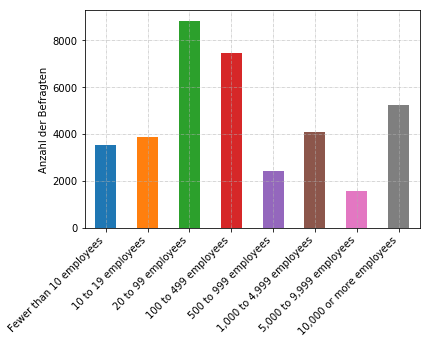

In [29]:
tmpdfcs.plot.bar(rot=45)
plt.xticks(horizontalalignment='right')
plt.grid(linestyle="-.", linewidth=0.5)
plt.ylabel('Anzahl der Befragten');

# Tabelle mit Häufigkeit 

In [30]:
df2 = pd.read_csv('datensatz_V2.csv')
lang = pd.read_csv('LanguagesWorkedWith.csv')
lang_sat = lang.join(df2.JobSatisfaction)

In [31]:
frequency = pd.DataFrame(index=df2.JobSatisfaction.unique())
frequency = frequency.T
frequency['Gesamt'] = [np.nan]*len(frequency)

In [39]:
# '#' entfernen um % angaben zu bekommen 
for language in lang.columns:
    disv = int(lang_sat[lang_sat.JobSatisfaction == 'dissatisfied'][language]\
    .value_counts()[1] / lang[language].value_counts()[1]*100 )
    dis = str(disv)  + '% in Spalte'
    
    
    neiv = int(lang_sat[lang_sat.JobSatisfaction == 'neither satisfied nor dissatisfied'][language]\
    .value_counts()[1] / lang[language].value_counts()[1] *100)
    nei = str(neiv) + '% in Spalte'
    
    
    satv = int(lang_sat[lang_sat.JobSatisfaction == 'satisfied'][language]\
    .value_counts()[1] / lang[language].value_counts()[1]*100) 
    sat = str(satv)  + '% in Spalte'
    
    ges =  lang[language].value_counts()[1]#/len(lang)
    frequency.loc[language] = [dis, nei, sat, ges]

In [40]:
frequency.sort_values(by='Gesamt', ascending=False).T

JavaScript           HTML  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  30% in Spalte  30% in Spalte   
satisfied                           57% in Spalte  56% in Spalte   
Gesamt                                      27106          25527   

                                              CSS            SQL  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  30% in Spalte  30% in Spalte   
satisfied                           56% in Spalte  56% in Spalte   
Gesamt                                      24438          22514   

                                       Bash/Shell           Java  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  28% in Spalte  31% in Spalte   
satisfied                           59% in Spalte  55% in Spalte   
Gesamt                                      16598          16011   

                                           Python             C#  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  29% in Spalte  30% in Spalte   
satisfied                           58% in Spalte  57% in Spalte   
Gesamt                                      14529          13671   

                                              PHP            C++  \
dissatisfied                        13% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  31% in Spalte  31% in Spalte   
satisfied                           55% in Spalte  56% in Spalte   
Gesamt                                      10435           8025   

                                       TypeScript              C  \
dissatisfied                        11% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  29% in Spalte  31% in Spalte   
satisfied                           58% in Spalte  56% in Spalte   
Gesamt                                       7519           6768   

                                             Ruby             Go  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  26% in Spalte  27% in Spalte   
satisfied                           60% in Spalte  60% in Spalte   
Gesamt                                       4287           3033   

                                            Swift    Objective-C  \
dissatisfied                        13% in Spalte  13% in Spalte   
neither satisfied nor dissatisfied  29% in Spalte  29% in Spalte   
satisfied                           57% in Spalte  57% in Spalte   
Gesamt                                       2998           2660   

                                           VB.NET              R  \
dissatisfied                        14% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  33% in Spalte  29% in Spalte   
satisfied                           51% in Spalte  58% in Spalte   
Gesamt                                       2395           2292   

                                           Groovy       Assembly  \
dissatisfied                        12% in Spalte  12% in Spalte   
neither satisfied nor dissatisfied  27% in Spalte  28% in Spalte   
satisfied                           60% in Spalte  59% in Spalte   
Gesamt                                       1984           1917   

                                            Scala         Kotlin  \
dissatisfied                        12% in Spalte  11% in Spalte   
neither satisfied nor dissatisfied  26% in Spalte  29% in Spalte   
satisfied                           60% in Spalte  59% in Spalte   
Gesamt                                       1875           1801   

                                           Matlab            VBA  \
dissatisfied                        11% in Spalte  13% in Spalte   
neither satisfied nor dissatisfied  31% in Spalte  30% in Spalte   
satisfied                           57% in Spalte  56% in Spalte   
Gesamt          